# Star catalogue analysis
This data comes from [The Astronomy Nexus](http://www.astronexus.com/hyg) and their colletion of the Hipparcos, Yale Bright Star, and Gliese catalogues.

Thanks to UCF Physics undergrad Tyler Townsend for contributing to the development of this notebook.

In [1]:
# Import modules that contain functions we need
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Getting the data
You'll need to download and unzip the data file [here](http://www.astronexus.com/files/downloads/hygdata_v3.csv.gz).

In [2]:
# Read in data that will be used for the calculations.
# Using pandas read_csv method, we can create a data frame

# use this if you downloaded the data to the same location as this notebook
data = pd.read_csv("./data/hygdata_v3.csv")

# If you're running this from the Binder link, use this data:
#data = pd.read_csv("./data/stars.csv")

In [3]:
# We wish too look at the first 5 rows of our data set
data.head()

,proper,ra,dec,dist,mag,absmag,ci,x,y,z,con,lum,var,var_min,var_max
0,Sol,0.000000,0.000000,0.0000,-26.70,4.850,0.656,0.000005,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN
1,NaN,0.000060,1.089009,219.7802,9.10,2.390,0.482,219.740502,0.003449,4.177065,Psc,9.638290,NaN,NaN,NaN
2,NaN,0.000283,-19.498840,47.9616,9.27,5.866,0.999,45.210918,0.003365,-16.008996,Cet,0.392283,NaN,NaN,NaN
3,NaN,0.000335,38.859279,442.4779,6.61,-1.619,-0.019,344.552785,0.030213,277.614965,And,386.901132,NaN,NaN,NaN
4,NaN,0.000569,-51.893546,134.2282,8.06,2.421,0.370,82.835513,0.012476,-105.619540,Phe,9.366989,NaN,NaN,NaN


In [4]:
# the names of all the columns in the dataset
data.columns

Index(['proper', 'ra', 'dec', 'dist', 'mag', 'absmag', 'ci', 'x', 'y', 'z',
       'con', 'lum', 'var', 'var_min', 'var_max'],
      dtype='object')

In [5]:
# There are some rows that need to be removed.
# If data.dist = 100000 then the will no longer be in the dataframe after the first two rows
rowsToDrop = data.dist == 100000
newData = data[rowsToDrop == False]
#this will check that the rows will be removed
print(len(newData))
print(len(data))

109399
119614


## Star map

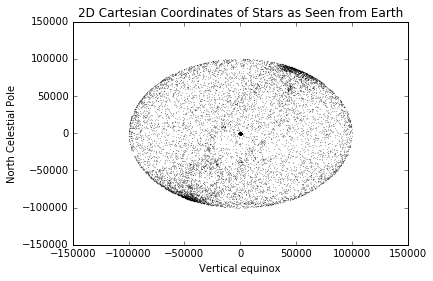

In [6]:
# Here is a plot of the carteisan coordinates of stars. The coordinate (0,0) is where the earth lies. 
plt.scatter(data.x,data.z, s=0.01)
plt.title("2D Cartesian Coordinates of Stars as Seen from Earth")
plt.xlabel('Vertical equinox')
plt.ylabel('North Celestial Pole')

## Does hotter mean brighter?

In [7]:
# make a column for temperature (from color index)
data['temp'] = 4600 * (1 / (.92 * data.ci + 1.7) + 1 / (.92 * data.ci + 0.62))

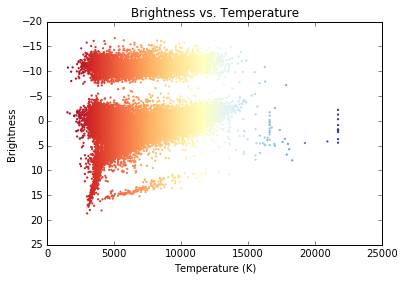

In [8]:
# This is similar to an H-R diagram,
#but with the more intuitive "temperature" instead of "spectral type"
colors = data.temp
plt.scatter(data.temp, data.absmag, c=colors, cmap=plt.cm.RdYlBu, s=5, edgecolors='none') 
plt.gca().invert_yaxis()
plt.title("Brightness vs. Temperature")
plt.ylabel("Brightness") #really absolute magnitude
plt.xlabel("Temperature (K)")